# Логистическая регрессия
Цель работы
Познакомиться с широко используемым методом бинарной классификации - логистической регрессией.

Содержание работы
Сгенерировать матрицу признаков и вектор целей для задачи классификации с использованием make_classification из библиотеки sklearn.datasets. Число классов возьмите равным двум.
Реализовать модель логистической регрессии методом градиентного спуска, не используя библиотечные функции.
Оценить качество построенной модели, используя метрики accuracy и F1-score.
Реализовать модель логистической регрессии LogisticRegression из библиотеки sklearn.linear_model и оценить качество построенной модели, используя метрики accuracy и F1-score.
Сравнить результаты двух реализаций.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [3]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


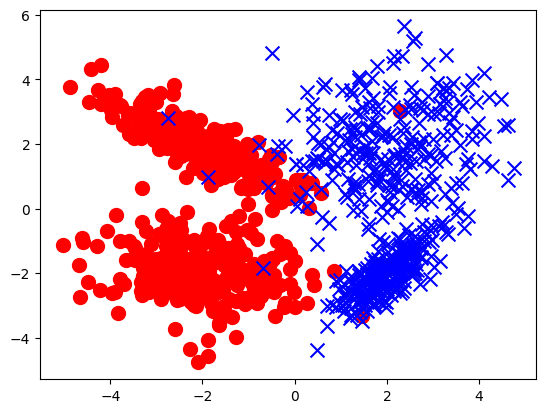

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

In [ ]:
# Создадим конструктор класса, реализующего градиентный спуск.

class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

In [ ]:
# Создадим класс, реализующего логистическую регрессию.

class LogReg(SGD):
    def sigmoid(self, X, b):        
        return 1. / (1. + np.exp(-X.dot(b)))
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [9]:
logreg = LogReg()

In [10]:
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [11]:
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [12]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [14]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [15]:
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

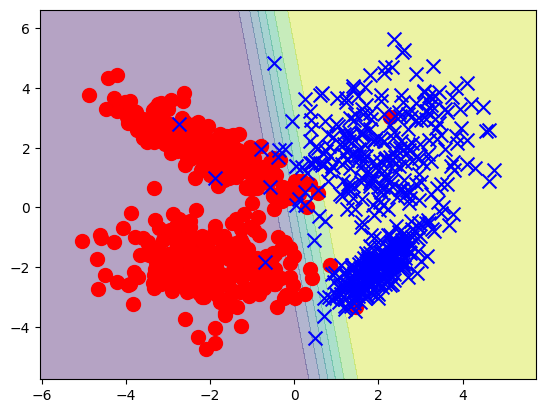

In [16]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [19]:
model.fit(X, y)
y_pred_lr = model.predict(X)

Далее необходимо вывести метрики качества аналогичным образом и сделать сравнение результатов.

In [20]:
ac = accuracy_score(y, y_pred_lr)
f1 = f1_score(y, y_pred_lr)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


# Контрольные вопросы

1. Сформулируйте, в чем состоит задача классификации, придумайте несколько примеров.

- Задача классификации — это задача машинного обучения, цель которой состоит в предсказании класса (категории) для объекта на основе его признаков. Классы заранее известны, и модель должна отнести объект к одному из них.

Классификация может быть:

Бинарной (два класса, например: 0 и 1, "да" и "нет").
Многоклассовой (больше двух классов, например: кошка, собака, птица).

2. Что такое шаг градиентного спуска?

- Шаг градиентного спуска — это изменение параметров модели на каждой итерации алгоритма с целью минимизации функции потерь.

Градиентный спуск — один из наиболее популярных методов оптимизации в машинном обучении. Основная идея состоит в том, чтобы итеративно обновлять параметры модели, двигаясь в направлении, противоположном градиенту функции потерь, так как он указывает направление наибольшего возрастания функции.

3. Какая функция используется в качестве функции ошибки в модели логистической регрессии?

- В модели логистической регрессии в качестве функции ошибки используется логарифмическая функция потерь (log loss), которая также известна как кросс-энтропийная ошибка.

4. Зачем при реализации логистической регрессии к матрице признаков добавлялся столбец из единиц?

- Добавление столбца из единиц к матрице признаков в логистической регрессии имеет важное значение для корректного учета свободного коэффициента в модели.

# Задания для самостоятельного выполнения

1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.

Численные результаты:
Accuracy: 0.9760
F1-score: 0.9761

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       499
           1       0.97      0.98      0.98       501

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



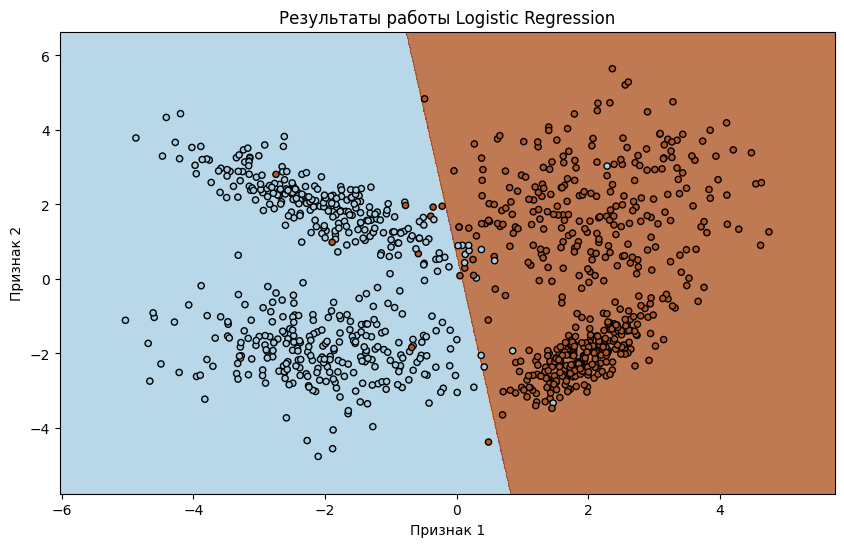

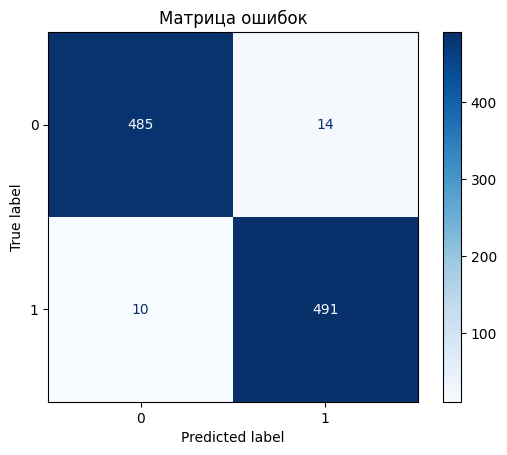

In [22]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay

# Генерация данных
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    class_sep=2,
    random_state=1
)

# Обучение библиотечной модели
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Численные результаты
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
report = classification_report(y, y_pred)

print("Численные результаты:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:")
print(report)

# Визуализация результатов
plt.figure(figsize=(10, 6))
# Разделяющая граница
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Отображение точек
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired, s=20)
plt.title("Результаты работы Logistic Regression")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

# Матрица ошибок
ConfusionMatrixDisplay.from_estimator(model, X, y, cmap=plt.cm.Blues)
plt.title("Матрица ошибок")
plt.show()


2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

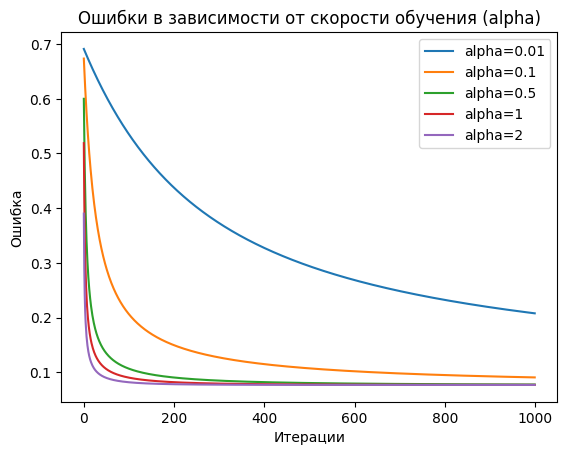

In [24]:

from sklearn.preprocessing import StandardScaler

# Генерация данных
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    class_sep=2,
    random_state=1
)

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

class LogReg:
    def __init__(self, alpha=0.01, n_iters=1000):
        self.alpha = alpha
        self.n_iters = n_iters
        self.b = None

    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X.dot(self.b)))

    def compute_loss(self, X, y):
        m = len(y)
        h = self.sigmoid(X)
        loss = - (1 / m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
        return loss

    def gradient_step(self, X, y, b_grad):
        return self.b - self.alpha * b_grad

    def optimize(self, X, y):
        m, n = X.shape
        self.b = np.zeros(n)
        loss_history = []

        for _ in range(self.n_iters):
            h = self.sigmoid(X)
            b_grad = (1 / m) * X.T.dot(h - y)
            self.b = self.gradient_step(X, y, b_grad)
            loss = self.compute_loss(X, y)
            loss_history.append(loss)
        
        return loss_history

    def fit(self, X, y):
        loss_history = self.optimize(X, y)
        return loss_history

    def predict(self, X):
        return self.sigmoid(X) > 0.5

# Пробуем разные значения alpha
alphas = [0.01, 0.1, 0.5, 1, 2]
losses = {}

for alpha in alphas:
    model = LogReg(alpha=alpha, n_iters=1000)
    loss_history = model.fit(X_scaled, y)
    losses[alpha] = loss_history

    # Проверка расходимости: если ошибка начинает расти, то это может свидетельствовать о расходимости
    plt.plot(loss_history, label=f"alpha={alpha}")

plt.title("Ошибки в зависимости от скорости обучения (alpha)")
plt.xlabel("Итерации")
plt.ylabel("Ошибка")
plt.legend()
plt.show()


3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

In [30]:
class LogReg(SGD):
    def sigmoid(self, X, b):
        # Вычисление сигмоиды
        return 1. / (1. + np.exp(-X.dot(b)))
    
    def add_intercept(self, X):
        # Добавление фиктивного столбца единиц в начало матрицы X
        ones = np.ones((X.shape[0], 1))
        return np.hstack([ones, X])

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        # Прогнозируем вероятности
        X = self.add_intercept(X)  # Добавляем фиктивный столбец
        return self.sigmoid(X, self.b)

    def predict(self, X):
        # Прогнозируем классы
        X = self.add_intercept(X)  # Добавляем фиктивный столбец
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

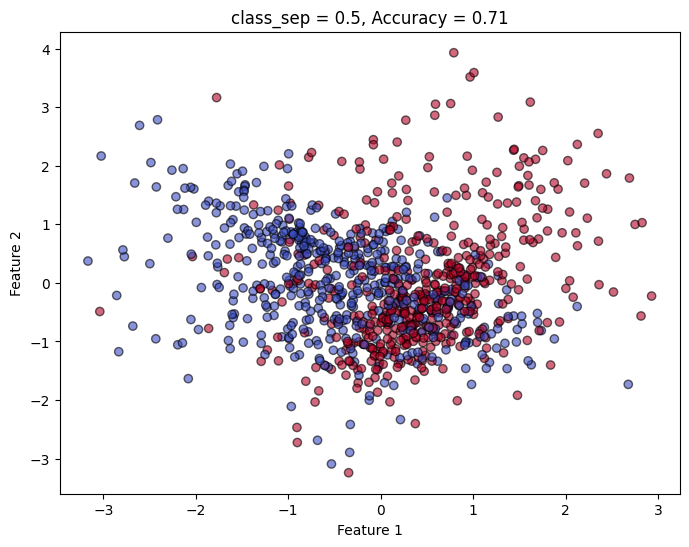

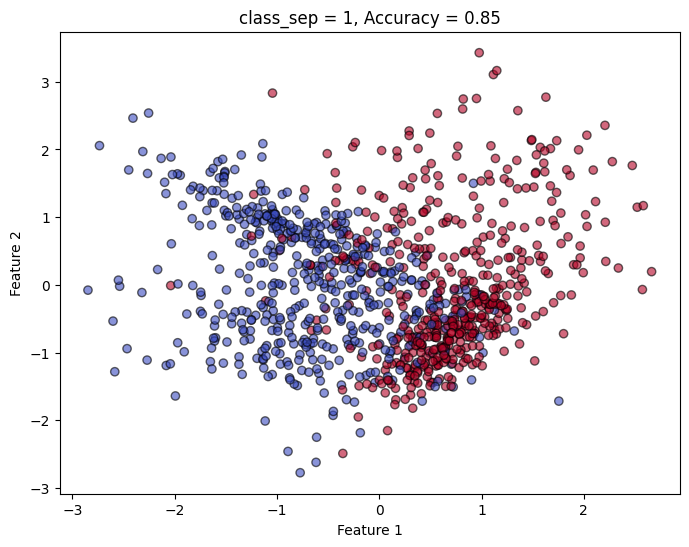

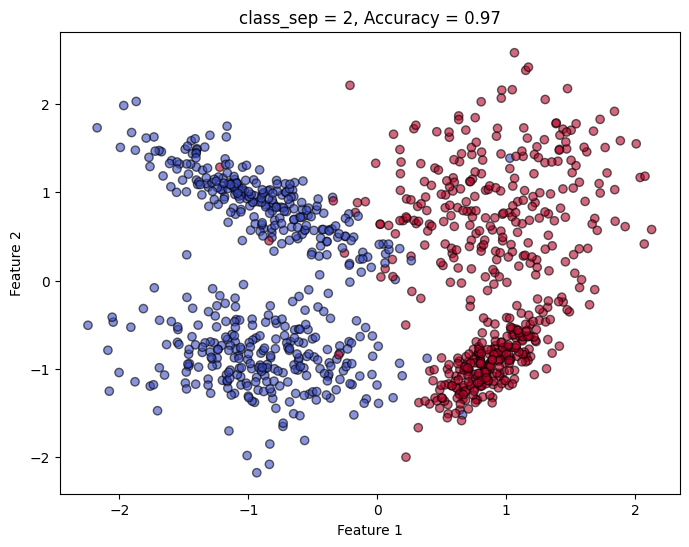

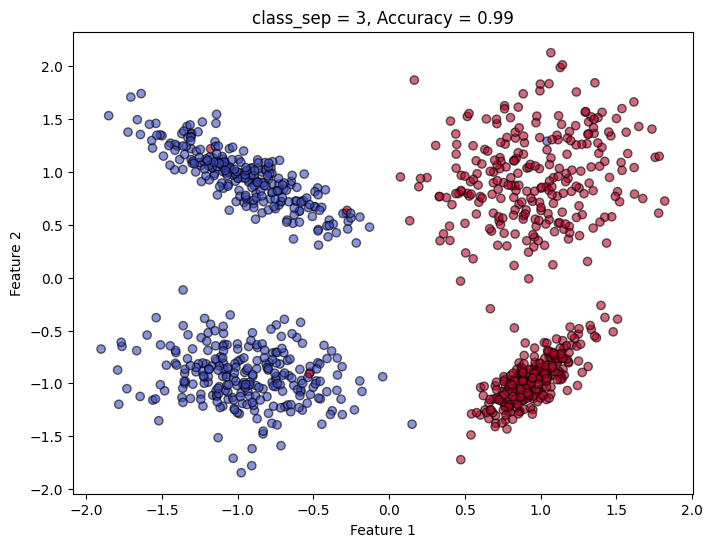

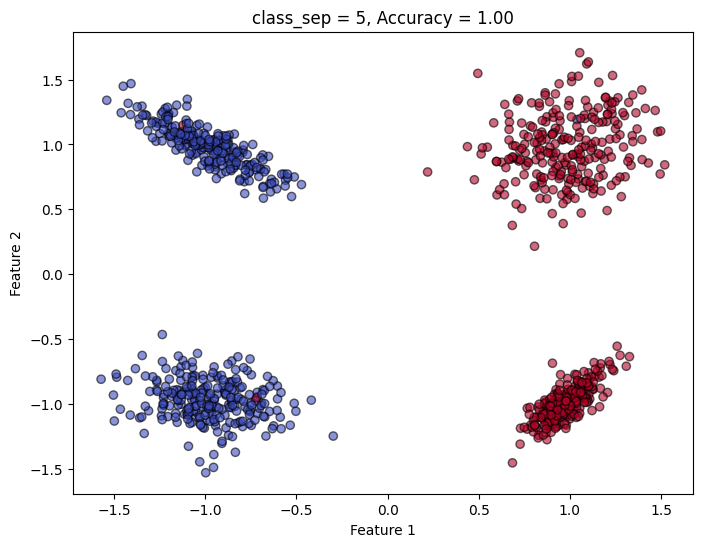

Accuracy for class_sep=0.5: 0.71
Accuracy for class_sep=1: 0.85
Accuracy for class_sep=2: 0.97
Accuracy for class_sep=3: 0.99
Accuracy for class_sep=5: 1.00


In [32]:
# Функция для генерации данных, обучения модели и оценки точности
def experiment_with_class_sep(class_sep_value):
    # Генерация данных
    X, y = make_classification(
        n_samples=1000,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_classes=2,
        class_sep=class_sep_value,  # варьируем класс сепарации
        random_state=1
    )

    # Нормализация данных
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Обучаем логистическую регрессию
    model = LogisticRegression()
    model.fit(X_scaled, y)
    
    # Прогнозируем и оцениваем точность
    y_pred = model.predict(X_scaled)
    accuracy = accuracy_score(y, y_pred)
    
    # Визуализация данных
    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm', edgecolors='k', alpha=0.6)
    plt.title(f"class_sep = {class_sep_value}, Accuracy = {accuracy:.2f}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

    return accuracy

# Эксперимент с различными значениями class_sep
class_sep_values = [0.5, 1, 2, 3, 5]
accuracies = []

for sep in class_sep_values:
    accuracy = experiment_with_class_sep(sep)
    accuracies.append(accuracy)

# Вывод точности для каждого значения class_sep
for sep, acc in zip(class_sep_values, accuracies):
    print(f"Accuracy for class_sep={sep}: {acc:.2f}")


In [33]:
# Генерация данных с большим числом признаков
n_features = 50
X, y = make_classification(
    n_samples=1000,      # 1000 образцов
    n_features=n_features,  # 50 признаков
    n_informative=n_features,  # Все признаки информативные
    n_redundant=0,        # Без избыточных признаков
    n_classes=2,         # Два класса
    class_sep=2,         # Разделение классов
    random_state=42
)

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Обучаем логистическую регрессию
model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)

# Прогнозируем и оцениваем точность
y_pred = model.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)

# Выводим точность модели
print(f"Accuracy for dataset with {n_features} features: {accuracy:.2f}")

Accuracy for dataset with 50 features: 0.97


In [ ]:
6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [41]:
# Генерация данных с большим количеством классов и признаков
n_classes = 4  # уменьшаем количество классов
n_features = 6  # увеличиваем количество признаков
X, y = make_classification(
    n_samples=1000,        # 1000 образцов
    n_features=n_features,  # 6 признаков
    n_informative=5,       # 5 информативных признаков
    n_redundant=0,         # без избыточных признаков
    n_classes=n_classes,   # 4 класса
    n_clusters_per_class=2, # 2 кластера на класс
    class_sep=2,           # Разделение классов
    random_state=42
)


In [42]:
# Реализация алгоритма "Один против всех":

class OvA_LogReg:
    def __init__(self, n_classes):
        self.n_classes = n_classes
        self.models = []
        
    def fit(self, X, y):
        for class_id in range(self.n_classes):
            # Преобразуем метки для классификации "один против всех"
            y_binary = (y == class_id).astype(int)
            model = LogisticRegression(max_iter=1000)
            model.fit(X, y_binary)
            self.models.append(model)
    
    def predict(self, X):
        # Предсказания для каждого классификатора
        predictions = np.zeros((X.shape[0], self.n_classes))
        for class_id, model in enumerate(self.models):
            predictions[:, class_id] = model.predict(X)
        # Возвращаем класс с максимальным предсказанием
        return np.argmax(predictions, axis=1)

In [43]:
# Решение задачи с использованием sklearn и оценки точности:

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создаем и обучаем модель "Один против всех"
ova_model = OvA_LogReg(n_classes=n_classes)
ova_model.fit(X_scaled, y)

# Прогнозируем
y_pred = ova_model.predict(X_scaled)

# Оценка точности
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy of OvA Logistic Regression: {accuracy:.2f}")


Accuracy of OvA Logistic Regression: 0.80


In [44]:
# Решение задачи с помощью sklearn (MultiClass Logistic Regression):

# Используем встроенную модель LogisticRegression
sklearn_model = LogisticRegression(max_iter=1000, multi_class='ovr')
sklearn_model.fit(X_scaled, y)

# Прогнозируем
y_pred_sklearn = sklearn_model.predict(X_scaled)

# Оценка точности
accuracy_sklearn = accuracy_score(y, y_pred_sklearn)
print(f"Accuracy of sklearn Logistic Regression (OvA): {accuracy_sklearn:.2f}")


Accuracy of sklearn Logistic Regression (OvA): 0.87


c:\Users\alesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [45]:
# Генерация данных с несколькими классами
n_classes = 4  # 4 класса
n_features = 6  # 6 признаков
X, y = make_classification(
    n_samples=1000,        # 1000 образцов
    n_features=n_features,  # 6 признаков
    n_informative=5,       # 5 информативных признаков
    n_redundant=0,         # без избыточных признаков
    n_classes=n_classes,   # 4 класса
    n_clusters_per_class=2, # 2 кластера на класс
    class_sep=2,           # Разделение классов
    random_state=42
)

# Обучение модели LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Получение вероятностей для каждого объекта
y_proba = model.predict_proba(X)

# Вывод первых 5 объектов и их вероятностей принадлежности каждому классу
print("Прогнозируемые вероятности для первых 5 объектов:")
print(y_proba[:5])


Прогнозируемые вероятности для первых 5 объектов:
[[8.60224266e-01 6.86608931e-02 6.97162386e-02 1.39860210e-03]
 [2.53951175e-02 9.74590525e-01 6.22233885e-06 8.13494430e-06]
 [8.91214960e-01 6.29168624e-02 4.07724967e-02 5.09568068e-03]
 [9.54105848e-01 6.10250485e-03 3.45276936e-02 5.26395382e-03]
 [9.68149230e-04 1.26110156e-06 3.61516482e-03 9.95415425e-01]]
